<a href="https://colab.research.google.com/github/Nagesh-Cheripally/Money_Transaction_Fraud_Detection/blob/main/Fraud_detection_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/archive.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [5]:
!pip install imblearn

In [38]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import io
import warnings; warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

In [6]:
data = pd.read_csv("/content/PS_20174392719_1491204439457_log.csv")

In [7]:
data.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1181389,132,CASH_OUT,360466.41,C1350110095,7002.0,0.00,C1277946259,0.00,360466.41,0,0
6186930,569,PAYMENT,8425.73,C947219062,0.0,0.00,M260290699,0.00,0.00,0,0
4432301,322,CASH_IN,96194.08,C633361217,214259.0,310453.08,C1668136163,552904.12,456710.04,0,0
1999047,179,CASH_OUT,170572.73,C1053436887,0.0,0.00,C124032760,272142.61,442715.34,0,0
4772969,335,PAYMENT,4230.17,C877581232,69423.0,65192.83,M199529143,0.00,0.00,0,0


In [10]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [57]:
# Total Frauds Count
Fraud_count = data['isFraud'].value_counts()
percent = data['isFraud'].value_counts(normalize=True)
Percentage = data['isFraud'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'isFraud': Fraud_count, 'Percentage': Percentage})

,isFraud,Percentage
0,6354407,99.9%
1,8213,0.1%


In [59]:
# Total Flagged Frauds Count
Flagged_Fraud_count = data['isFlaggedFraud'].value_counts()
percent = data['isFlaggedFraud'].value_counts(normalize=True)
Percantage = data['isFlaggedFraud'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'isFlaggedFraud': Flagged_Fraud_count, 'Percentage': Percantage})

,isFlaggedFraud,Percentage
0,6362604,100.0%
1,16,0.0%


In [13]:
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

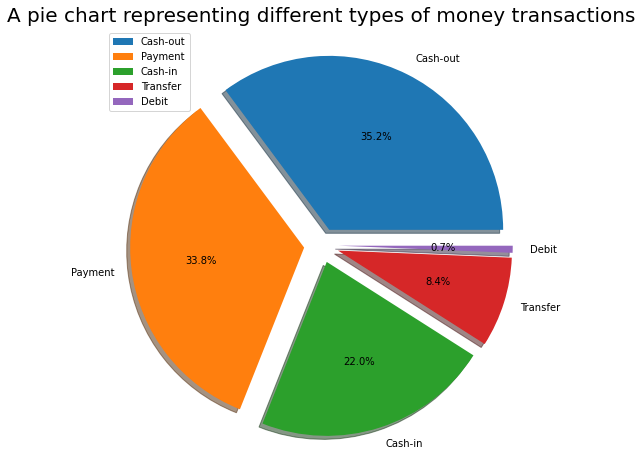

In [14]:
labels = ['Cash-out', 'Payment', 'Cash-in', 'Transfer', 'Debit']
size = [2237500, 2151495, 1399284, 532909, 41432]
explode = [0.1, 0.1, 0.1, 0.1, 0.1]
plt.rcParams['figure.figsize'] = (10, 8)
plt.pie(size, explode = explode, labels = labels, shadow = True, autopct='%1.1f%%')
plt.title('A pie chart representing different types of money transactions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

mu = 243.40 and sigma = 142.33


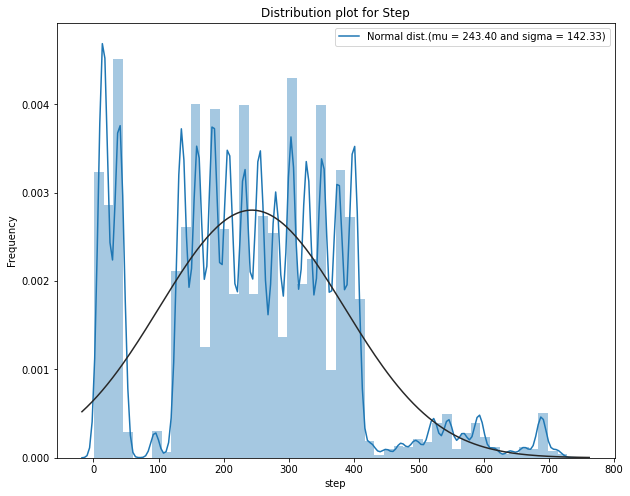

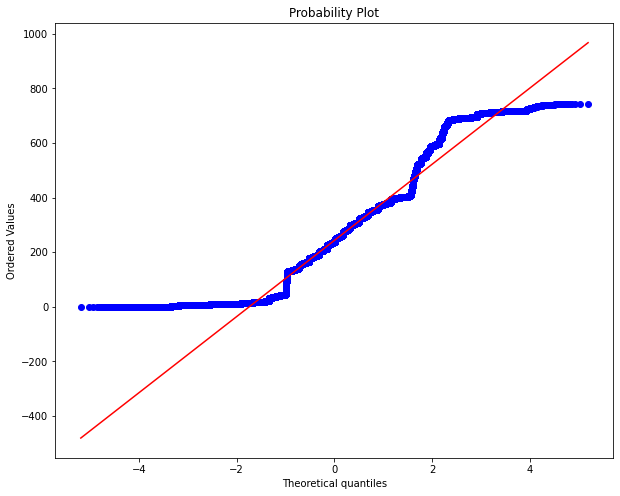

In [15]:
plt.rcParams['figure.figsize'] =(10, 8)

# importing norm
from scipy import stats
from scipy.stats import norm, skew

sns.distplot(data.step, fit = norm)

(mu,sigma) = norm.fit(data.step)
print('mu = {:.2f} and sigma = {:.2f}'.format(mu,sigma))

plt.legend(['Normal dist.(mu = {:.2f} and sigma = {:.2f})'.format(mu,sigma)],loc = 'best')
plt.ylabel('Frequency')
plt.title('Distribution plot for Step')

## Q-Q PLOT
fig = plt.figure()
res = stats.probplot(data.step ,plot = plt)
plt.show()

In [16]:
# Types of fraudulent transaction out of all the transaction modes.

print('The Types of fraudulent transactions are {}'.format(list(data.loc[data.isFraud == 1].type.drop_duplicates().values)) )

The Types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']


In [17]:
# Total fraud transfer and fraud cash outs
FraudTransfer = data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')]
FraudCashout = data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')]


#Number of fraudulent transfers and cash outs
print ('The number of fraudulent TRANSFERs = {}'.format(len(FraudTransfer)))
print ('The number of fraudulent CASH_OUTs = {}'.format(len(FraudCashout)))

The number of fraudulent TRANSFERs = 4097
The number of fraudulent CASH_OUTs = 4116


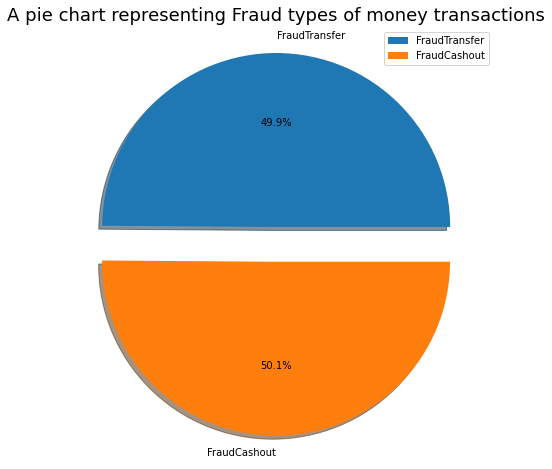

In [18]:
labels = ['FraudTransfer', 'FraudCashout']
size = [4097, 4116]
explode = [0.1, 0.1]
plt.rcParams['figure.figsize'] = (10, 8)
plt.pie(size, explode = explode, labels = labels, shadow = True, autopct='%1.1f%%')
plt.title('A pie chart representing Fraud types of money transactions', fontsize = 18)
plt.axis('off')
plt.legend()
plt.show()

In [19]:
# Minimum and maximum transaction from Transfer and cash out transaction mode when it is set to be Fraud

print("Transfer Transaction")
print("Min Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')].amount.min())
print("Max Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')].amount.max())

print("\nCASH_OUT Transaction")
print("Min Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')].amount.min())
print("Max Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')].amount.max())

Transfer Transaction
Min Transaction : 63.8
Max Transaction : 10000000.0

CASH_OUT Transaction
Min Transaction : 0.0
Max Transaction : 10000000.0


In [20]:
# finding out the transactions which are flagged to be fraud

print("The Type of Transaction in which IsFlagged:", data.loc[data.isFlaggedFraud == 1].type.drop_duplicates().values)

The Type of Transaction in which IsFlagged: ['TRANSFER']


In [21]:
FlaggedFraud = data.loc[(data.isFlaggedFraud == 1) & (data.type == 'TRANSFER')]
print("The no. of Flagged Fraudulent Transactions :", len(FlaggedFraud))

The no. of Flagged Fraudulent Transactions : 16


In [22]:
print("Min Transaction :", data.loc[data.isFlaggedFraud == 1].amount.min())
print("Max Transaction :", data.loc[data.isFlaggedFraud == 1].amount.max())

Min Transaction : 353874.22
Max Transaction : 10000000.0


In [23]:
# types of fraud transactions
fraud_trans = list(data.loc[data.isFraud==1].type.drop_duplicates().values)
print('Types of transactions that have Frauds: ',fraud_trans)

# plot for the same
# fraud_count = trans_data.groupby(['isFraud','type']).size().plot(kind='bar')

# removing the data which do not have fraudalant transactions
trans_data_new = data.loc[(data['type'].isin(['TRANSFER','CASH_OUT'])),:] 
trans_data_new.sample(5)

Types of transactions that have Frauds:  ['TRANSFER', 'CASH_OUT']


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5334328,374,CASH_OUT,42005.96,C1181884311,104513.0,62507.04,C37260274,2.936606e+05,3.356666e+05,0,0
5464464,379,CASH_OUT,106947.04,C1176604832,0.0,0.00,C1512993148,1.774308e+08,1.775377e+08,0,0
4412099,322,CASH_OUT,423746.70,C2033872023,104.0,0.00,C84261911,2.497219e+05,6.734686e+05,0,0
4626624,329,CASH_OUT,408927.07,C467018880,0.0,0.00,C1329201854,5.318790e+05,9.408061e+05,0,0
270494,15,TRANSFER,203379.92,C224497954,0.0,0.00,C784984580,5.855469e+05,6.224327e+05,0,0


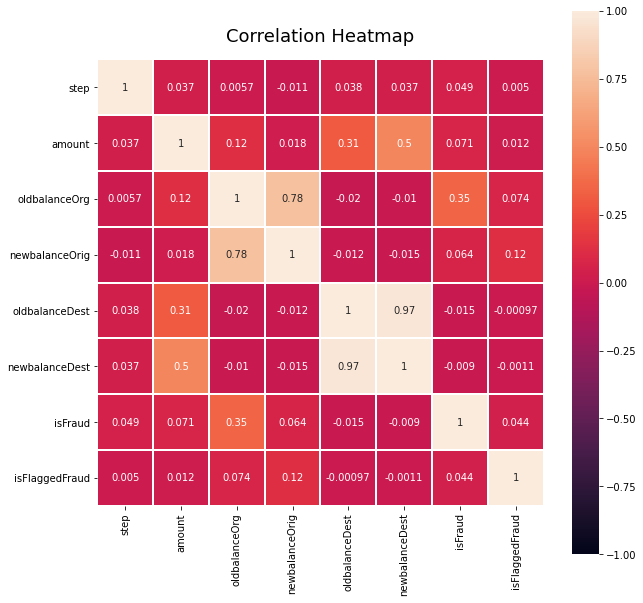

<Figure size 2880x2880 with 0 Axes>

In [24]:
# Using HeatMap
corrMatrix = trans_data_new.corr()
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(corrMatrix, annot=True, vmin = -1, vmax = 1,linewidths = 1, square = 'true')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=18)
plt.figure(figsize=(40,40))
plt.show()

In [25]:
# making dependent and independent sets
X = data.loc[(data.type == 'TRANSFER') | (data.type == 'CASH_OUT')]
# shape of x
X.shape

(2770409, 11)

In [26]:
X.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2110991,183,CASH_OUT,65593.93,C786300027,10148.0,0.00,C1038265713,1248737.59,1314331.52,0,0
4219901,306,CASH_OUT,290621.86,C1368780939,0.0,0.00,C1480968030,5881708.15,6172330.02,0,0
766992,39,CASH_OUT,35307.83,C464377893,3038.0,0.00,C934803124,7089931.67,7125239.50,0,0
521534,20,CASH_OUT,156823.24,C276633108,3030.0,0.00,C879673979,0.00,156823.24,0,0
2836727,226,CASH_OUT,9760.93,C1609453995,126471.0,116710.07,C510750886,214131.43,223892.36,0,0


In [27]:
X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest

In [28]:
# removing unwanted columns

X = X.drop(['nameDest','nameOrig'], axis = 1)

# checking the new shape of data
X.shape

(2770409, 11)

In [29]:
# label encoding for the transaction type

X['type'].replace('TRANSFER', 0, inplace = True)
X['type'].replace('CASH_OUT', 1, inplace = True)


# looking at the head of the data

X.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.00,0.0,0.0,0.00,1,0,0.00,181.00
3,1,1,181.00,181.00,0.0,21182.0,0.00,1,0,0.00,21363.00
15,1,1,229133.94,15325.00,0.0,5083.0,51513.44,0,0,213808.94,182703.50
19,1,0,215310.30,705.00,0.0,22425.0,0.00,0,0,214605.30,237735.30
24,1,0,311685.89,10835.00,0.0,6267.0,2719172.89,0,0,300850.89,-2401220.00
42,1,1,110414.71,26845.41,0.0,288800.0,2415.16,0,0,83569.30,396799.55
47,1,1,56953.90,1942.02,0.0,70253.0,64106.18,0,0,55011.88,63100.72
48,1,1,5346.89,0.00,0.0,652637.0,6453430.91,0,0,5346.89,-5795447.02
51,1,1,23261.30,20411.53,0.0,25742.0,0.00,0,0,2849.77,49003.30
58,1,0,62610.80,79114.00,16503.2,517.0,8383.29,0,0,0.00,54744.51


In [30]:
X.isnull().any().any()

False

In [31]:
X.sample(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
5878748,403,1,255972.55,0.0,0.0,2911680.98,3167653.53,0,0,255972.55,0.00
4039614,299,1,109769.40,792.0,0.0,939429.10,1049198.50,0,0,108977.40,0.00
5266317,372,1,11618.76,0.0,0.0,960797.82,972416.58,0,0,11618.76,0.00
3771764,280,1,145869.84,0.0,0.0,1460760.32,2215773.15,0,0,145869.84,-609142.99
5311549,373,1,135724.62,0.0,0.0,498563.75,634288.36,0,0,135724.62,0.01


In [32]:
# making our independent set

Y = X['isFraud']

# removing the dependent set
X = X.drop(['isFraud'], axis = 1)

# getting the shapes of x and y
print("Shape of x: ", X.shape)
print("Shape of y: ", Y.shape)

Shape of x:  (2770409, 10)
Shape of y:  (2770409,)


In [33]:
# splitting the dataset into train and tests

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# checking the new shapes
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

# performing standard scaling on the data for better fit

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Shape of x_train:  (2216327, 10)
Shape of x_test:  (554082, 10)
Shape of y_train:  (2216327,)
Shape of y_test:  (554082,)


In [43]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost.sklearn import XGBClassifier
import xgboost as xgb

In [44]:
models = [
           ['RandomForestClassifier: ',RandomForestClassifier()],
           ['ExtraTreesClassifier :',ExtraTreesClassifier()],
           ['GradientBoostingClassifier: ', GradientBoostingClassifier()] ,
           ['XGBClassifier: ', xgb.XGBClassifier()] ,
         ]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [45]:
import time
from math import sqrt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing, model_selection, metrics
from sklearn.metrics import average_precision_score

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(x_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_score"] = metrics.average_precision_score(y_train,curr_model.predict(x_train))
    curr_model_data["Test_score"] = metrics.average_precision_score(y_train,curr_model.predict(x_train))
    model_data.append(curr_model_data)

In [46]:
model_data

[{'Name': 'RandomForestClassifier: ',
  'Test_R2_Score': 0.9998484061916362,
  'Train_': 0.9998484061916362,
  'Train_Time': 595.630734205246},
 {'Name': 'ExtraTreesClassifier :',
  'Test_R2_Score': 1.0,
  'Train_': 1.0,
  'Train_Time': 151.62528252601624},
 {'Name': 'GradientBoostingClassifier: ',
  'Test_R2_Score': 0.4445278734152969,
  'Train_': 0.4445278734152969,
  'Train_Time': 712.7135846614838},
 {'Name': 'XGBClassifier: ',
  'Test_R2_Score': 0.9954517577686527,
  'Train_': 0.9954517577686527,
  'Train_Time': 137.45592427253723}]

In [47]:
# Convert list to dataframe
df2 = pd.DataFrame(model_data)
df2

,Name,Train_Time,Train_,Test_R2_Score
0,RandomForestClassifier:,595.630734,0.999848,0.999848
1,ExtraTreesClassifier :,151.625283,1.000000,1.000000
2,GradientBoostingClassifier:,712.713585,0.444528,0.444528
3,XGBClassifier:,137.455924,0.995452,0.995452


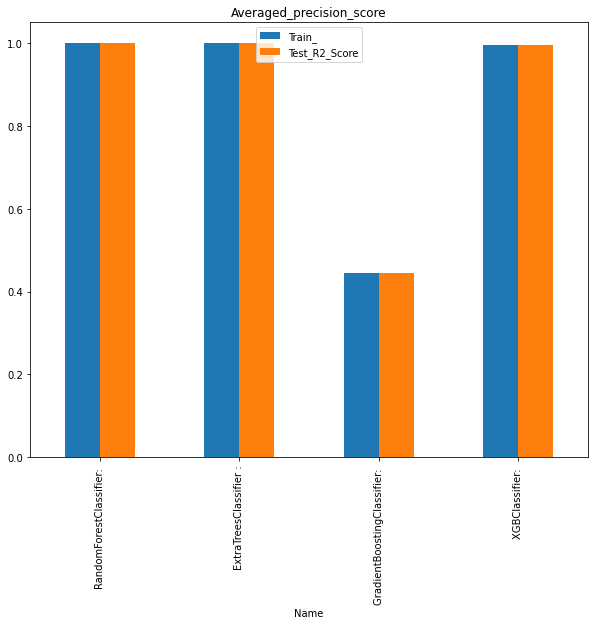

In [49]:
df2.plot(x="Name", y=['Train_' , 'Test_R2_Score'], kind="bar" , title = 'Averaged_precision_score' , figsize= (10,8))

In [55]:
print(confusion_matrix(y_test, y_pred))

[[552446      0]
 [     2   1634]]


In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552446
           1       1.00      1.00      1.00      1636

    accuracy                           1.00    554082
   macro avg       1.00      1.00      1.00    554082
weighted avg       1.00      1.00      1.00    554082

